In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import re
import os
def digital_input(logic,name,amp=20,step=.25,freq =1,shift=.5,len=10):

    l = np.size(logic)
    if l<len:
        logic = np.append(logic, np.zeros(len-l))    
    pulse= amp*np.ones(int(freq/step*1000))
    sign=2*np.array(logic)-1

    for i,s in enumerate(sign):
        if i==0:
            out = s*pulse
        out = np.concatenate((out,s*pulse))
    out = out[int(freq*shift/step*1000):]
    f = open('./Cqfp/'+name,'w')
    for x in out:
        f.write(str(x)+' ')

    f.close()

    return


def setup():
    #  and gate inputs
    digital_input([1,1,1,1,0,0,1,1,1,1],name ='wform1.txt',amp=10,shift=1.75,freq=1,len=45)
    digital_input([1,1,1,0,1,0,1,1,1,1],name ='wform2.txt',amp=10,shift=1.75,freq=1,len=45)

    # shift register inputs
    #digital_input([1,1,1,1,0,1,1,1,1,1,1,1,1],name ='wform.txt',amp=10,shift=.75,freq=1,len=45)

    #digital_input([0],amp=20,shift=.5,freq=.5,len=45)


    os.system('josim-cli -o ./out.csv ./Cqfp/nand_gate.cir -V 1')

    #os.system('josim-cli -o ./out.csv ./Cqfp/const_cells.cir -V 1')
    #os.system('josim-cli -o ./out.csv ./Cqfp/inv_reg.cir -V 1')
    #os.system('josim-cli -o ./out.csv ./Cqfp/shift_reg.cir -V 1')
    #os.system('josim-cli -o ./out.csv ./Cqfp/cd_buffer.cir -V 1')
    #os.system('josim-cli -o ./out.csv ./Cqfp/cd_buffer_crosscurrent.cir -V 1')



JoSIM: Josephson Junction Superconductive SPICE Circuit Simulator
Copyright (C) 2020 by Johannes Delport (jdelport@sun.ac.za)
v2.6.6.d6d4456 compiled on Dec 15 2022 at 15:47:09

Input: ./Cqfp/nand_gate.cir

Output: ./out.csv

[OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO] 100% Parsing Input
[OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO] 100% Expanding Subcircuits
[OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO] 100% Expanding Main Circuit
[OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO] 100% Creating Matrix
Printing circuit statistics:
Main design lines:        21
Subcircuit count:         5
Component count:          85
Non-zero count:           407
MxN size:                 151x151
JJ count:                 8
Inductor count:           57
Resistor count:           8
Capacitor count:          8
Current source count:     2
Voltage source count:     4

[OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO] 100% Simulating
[OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO] 100% Formatting Output
13OOO                          ] 12% Writing Output
[OOOOOOOOOOOOOOOOOOOOOOOOOOOOOO] 100% Wr

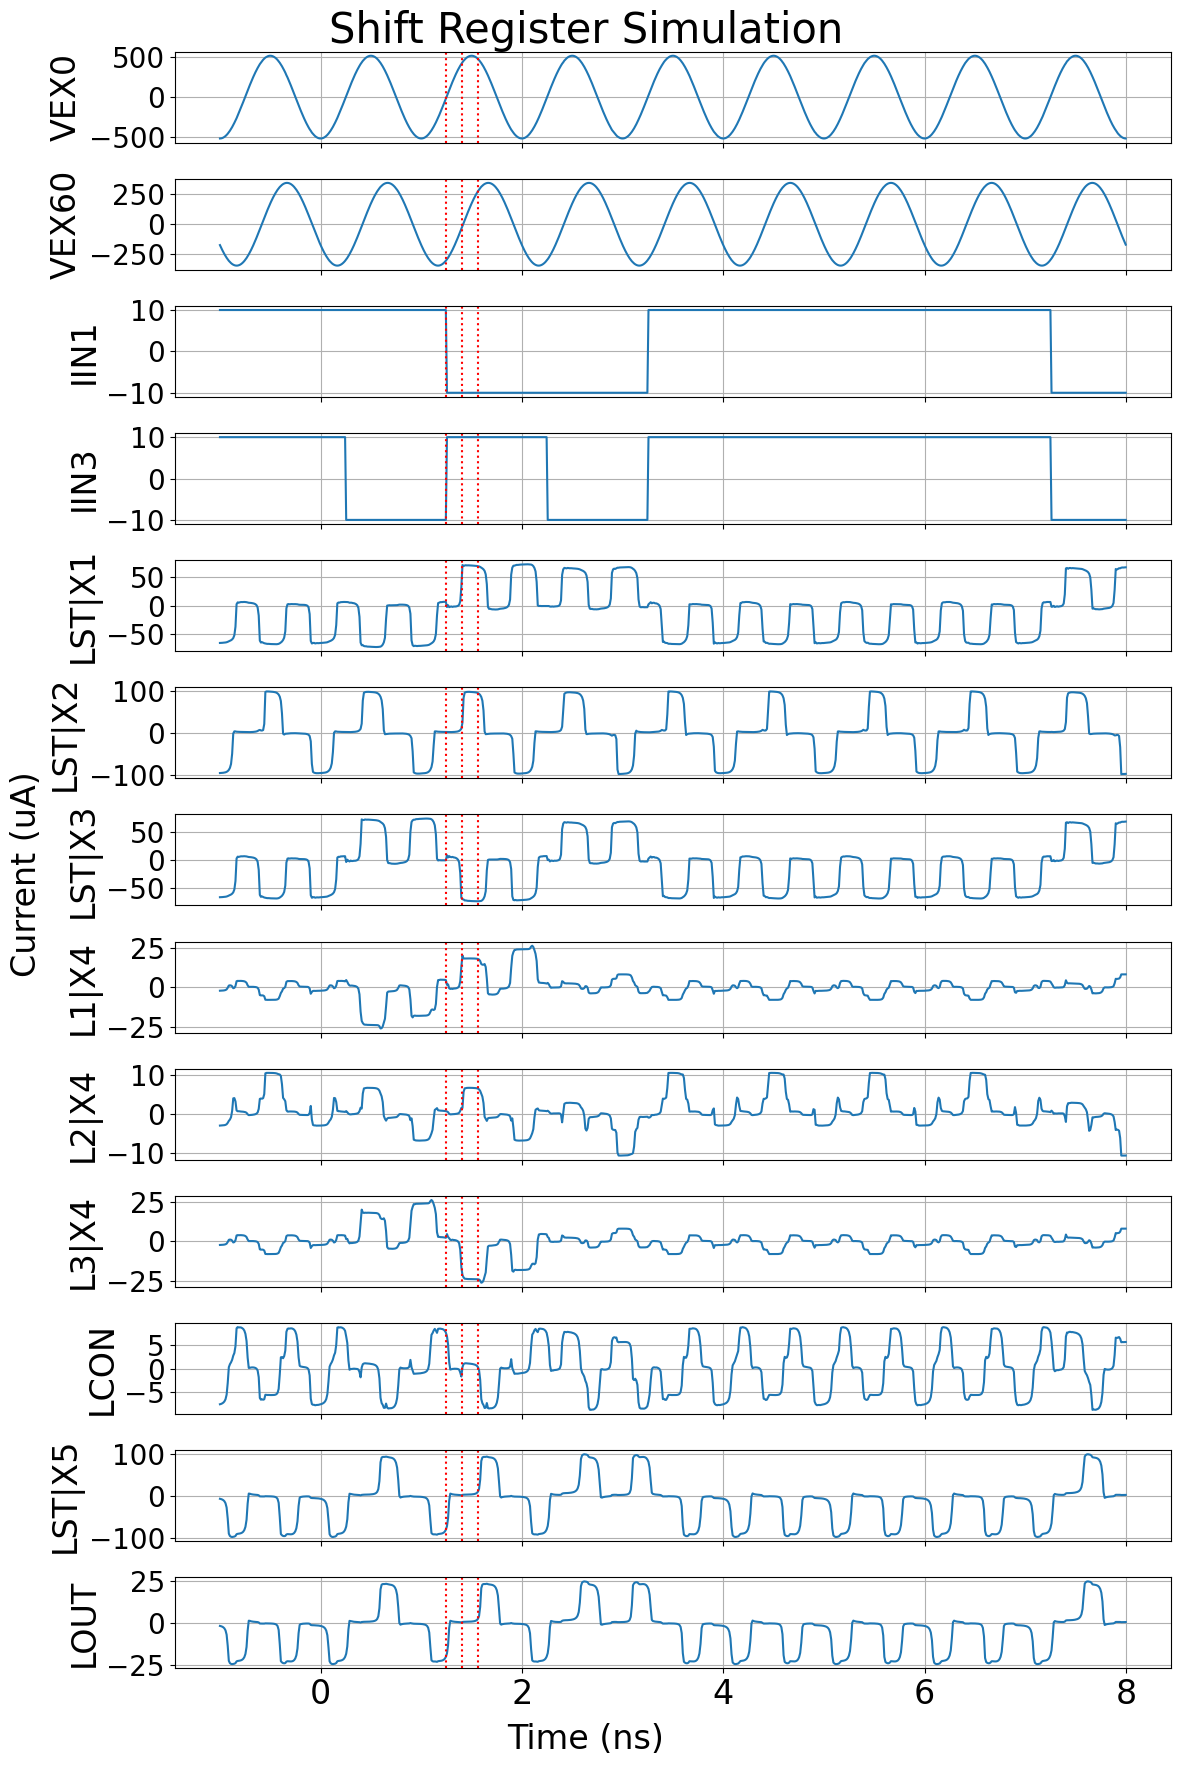

In [51]:
setup()

df = pd.read_csv("out.csv")
data = df.to_numpy()
cols = df.columns.to_numpy()
cols = cols[1:]

time = data[:,0]*1e9-2.0
nplots = np.shape(data[1])[0]-1
print(nplots)

#fig, ax = plt.subplots(nplots, figsize = (12,10),sharex=True,sharey=True,squeeze=True)
fig = plt.figure(figsize=(12,2*9))
gs = fig.add_gridspec(nplots)
ax = gs.subplots(sharex=True)

fig.supxlabel("Time (ns)",fontsize=24)
fig.supylabel("Current (uA)",fontsize=24)

prefixes = ['A','mA','uA','nA']

fig.suptitle('Shift Register Simulation',fontsize=30)
for i in range(nplots):
    y = data[:,i+1]

    if i ==0:
        y=y/2

    m=np.max(np.abs(y))
    prei = 0

    for j,pre in enumerate(prefixes):
        if m < 1:
            prei = j
        m = m*1000
    prei=prei+1
    pre = prefixes[prei]

    #edit this out normally
    #prei = 0


    ax[i].plot(time,y*(1000)**prei)
    # ax[i].set_ylabel("%s [%s]"%(cols[i],pre),fontsize=12)
    ylabel = re.split(r"\(|\)",cols[i])[1]
    ax[i].set_ylabel("%s"%ylabel,fontsize=24)

    ax[i].grid()
    ax[i].axvline(1.4,color="r",linestyle=':')
    ax[i].axvline(1.25,color="r",linestyle=':')
    ax[i].axvline(1.4+1/6,color="r",linestyle=':')

 
    #ax[0].axvline(2.25,color="r",linestyle=':')
    #ax[0].axvline(3.25,color="r",linestyle=':')
    #ax[1].axvline(2.25,color="r",linestyle=':')
    #ax[1].axvline(3.25,color="r",linestyle=':')
    #ax[2].axvline(2.25,color="r",linestyle=':')
    #ax[2].axvline(3.25,color="r",linestyle=':')

    #ax[3].axvline(2.25+1/6*4,color="r",linestyle=':')
    #ax[3].axvline(3.25+1/6*4,color="r",linestyle=':')
    #ax[4].axvline(2.25+1/6*5,color="r",linestyle=':')
    #ax[4].axvline(3.25+1/6*5,color="r",linestyle=':')
    #ax[5].axvline(2.25+1/6*11,color="r",linestyle=':')
    #ax[5].axvline(3.25+1/6*11,color="r",linestyle=':')
    #ax[i].label_outer()
    ax[i].tick_params(axis='y', which='major', labelsize=20)
    ax[i].tick_params(axis='x', which='major', labelsize=24)
    

    #if i>0:
        #ax[i].axvline(4.5+(i-2)*.166,color="g")
    #    for peak in peaks:
    #        sdfghjk=1
            #ax[i].axvline(peak,color='r')

#plt.xlim([0,4])



plt.tight_layout()

